In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File Path
PATH = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(PATH)

print("Shape:", df.shape)
print(df.head(3))
print("\nMissing values (top):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("\nTarget distribution:")
print(df["Churn"].value_counts(dropna=False))

Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCh

In [3]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# TotalCharges has blanks -> convert safely
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("Missing values (top 15):")
display(df.isna().sum().sort_values(ascending=False).head(15))

df.describe(include="all").T.head(20)


Missing values (top 15):


TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
customerID           0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Churn
0    5174
1    1869
Name: count, dtype: int64


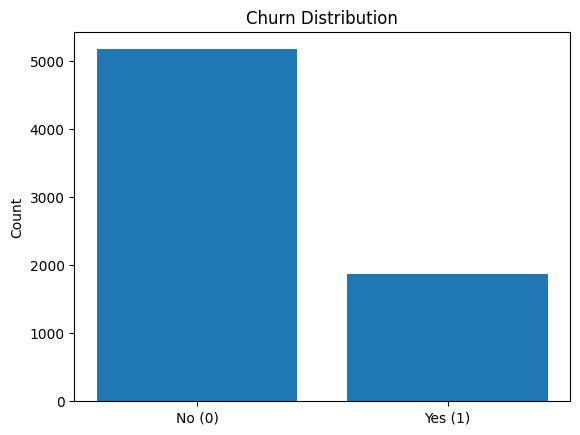

In [4]:
counts = df["Churn"].value_counts()
print(counts)

plt.figure()
plt.bar(["No (0)", "Yes (1)"], [counts.get(0,0), counts.get(1,0)])
plt.title("Churn Distribution")
plt.ylabel("Count")
plt.show()


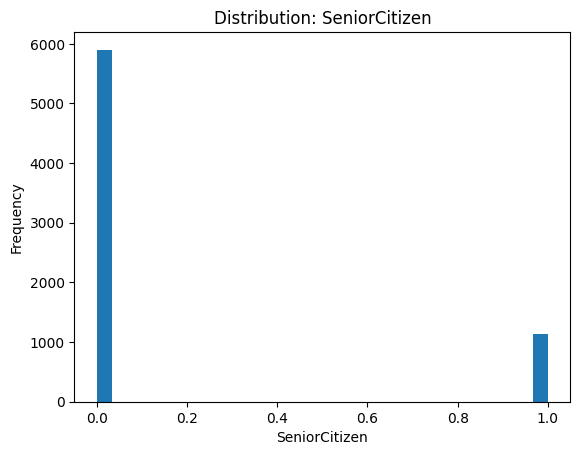

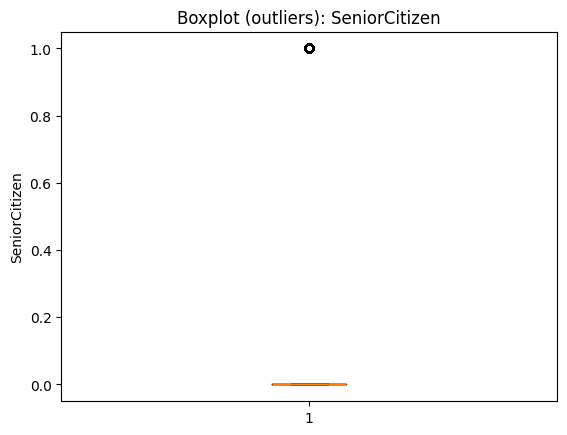

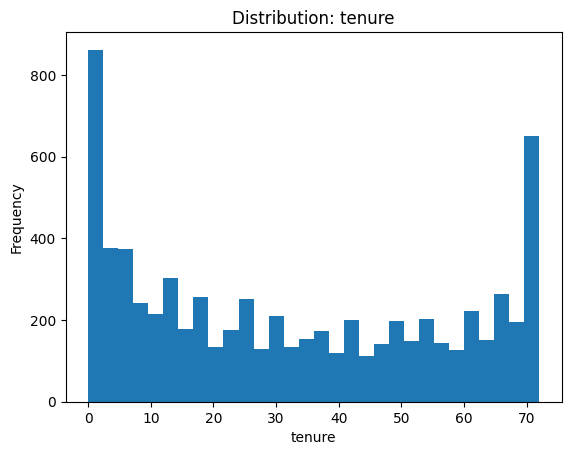

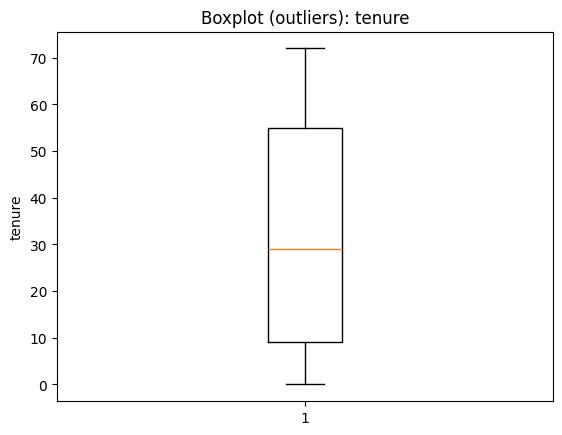

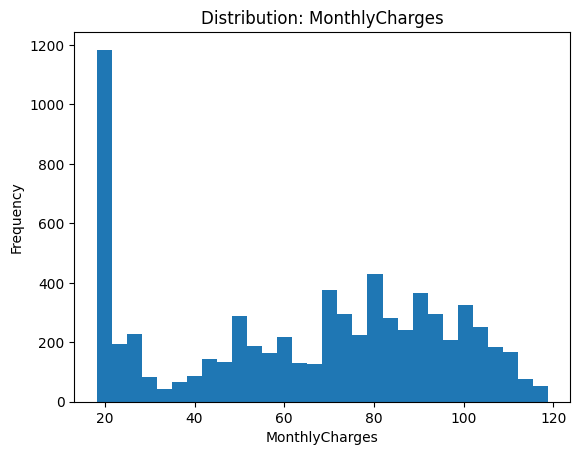

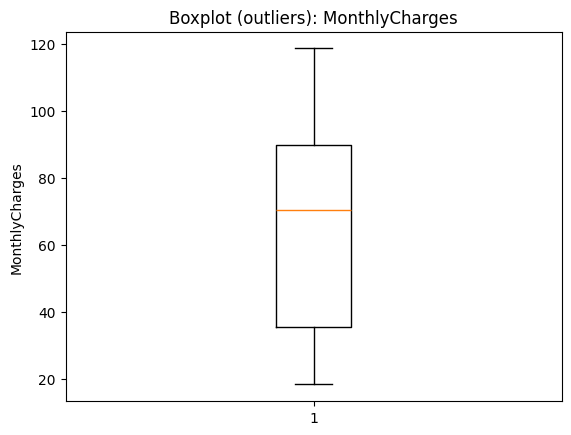

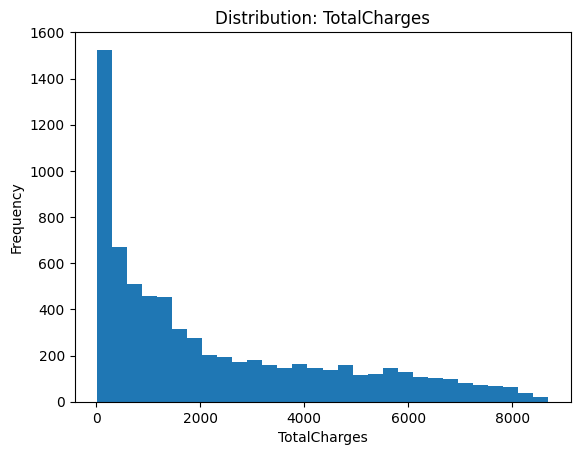

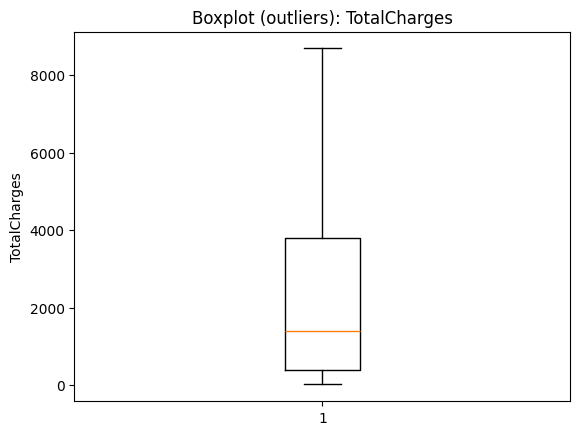

In [5]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c != "Churn"]

for c in num_cols:
    plt.figure()
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Boxplot (outliers): {c}")
    plt.ylabel(c)
    plt.show()


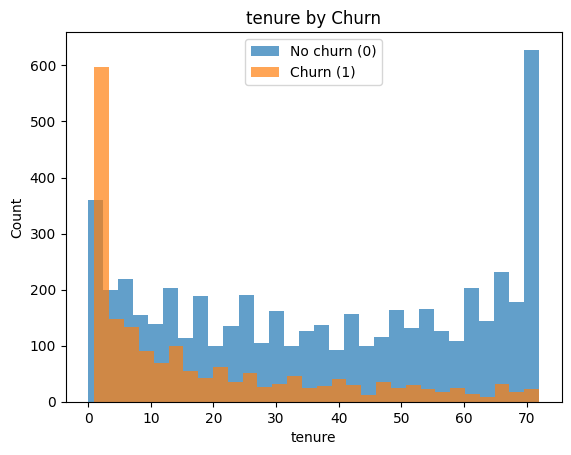

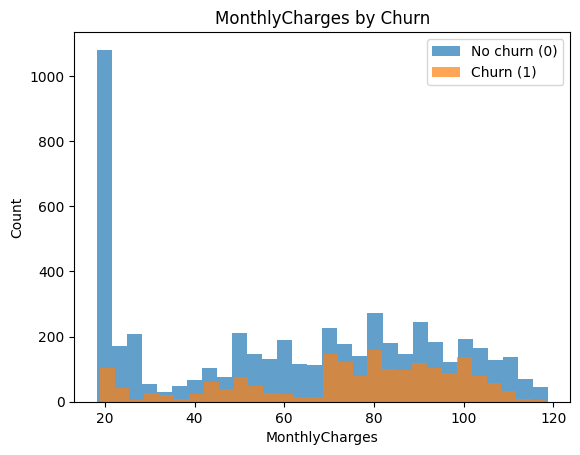

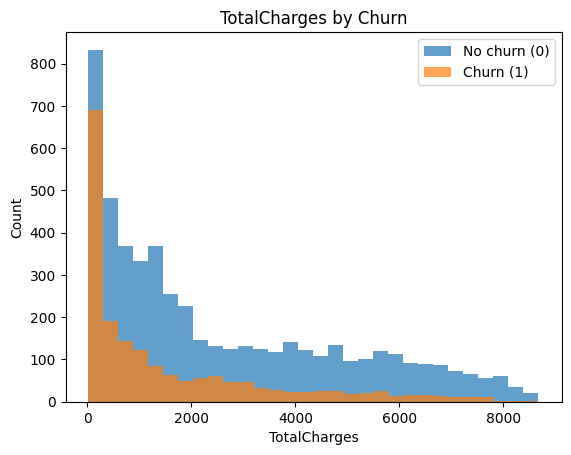

In [6]:
key_nums = ["tenure", "MonthlyCharges", "TotalCharges"]

for c in key_nums:
    g0 = df.loc[df["Churn"]==0, c].dropna()
    g1 = df.loc[df["Churn"]==1, c].dropna()

    plt.figure()
    plt.hist(g0, bins=30, alpha=0.7, label="No churn (0)")
    plt.hist(g1, bins=30, alpha=0.7, label="Churn (1)")
    plt.title(f"{c} by Churn")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.legend()
    plt.show()


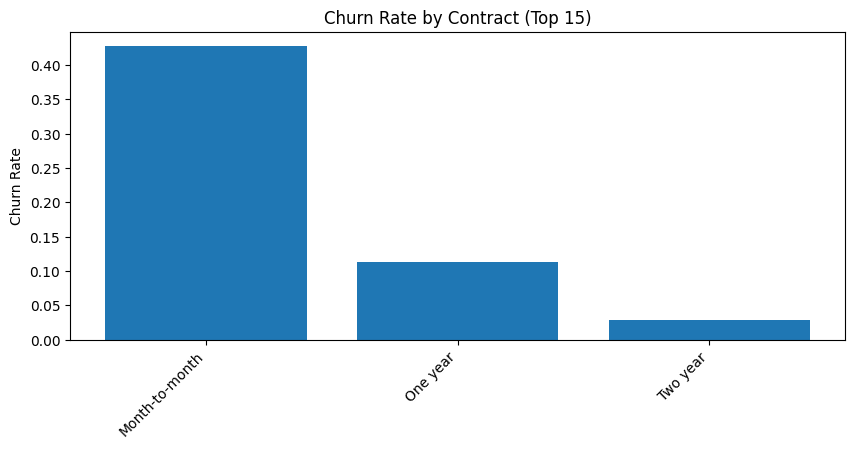

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

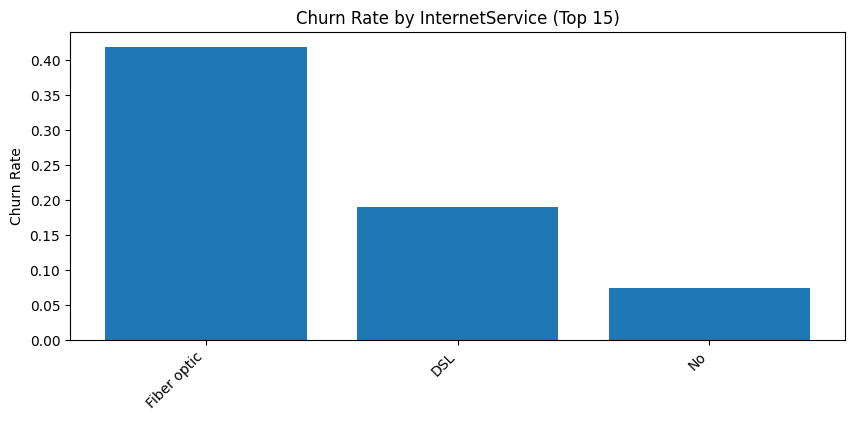

InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Churn, dtype: float64

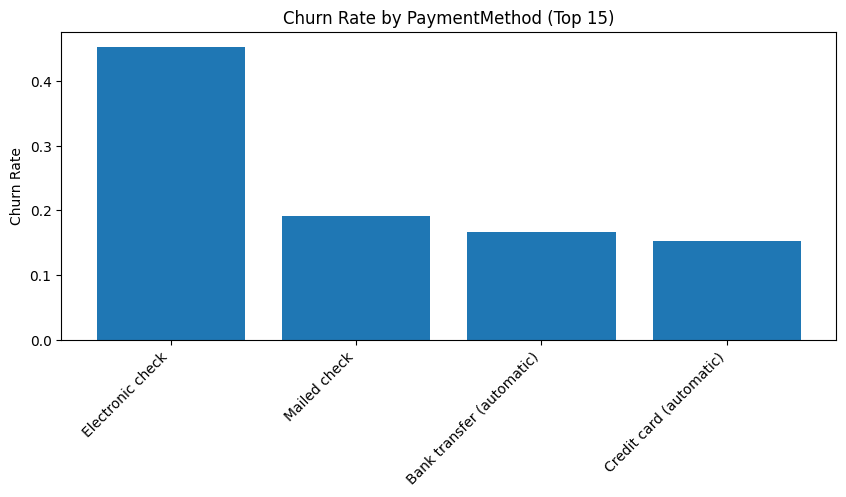

PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64

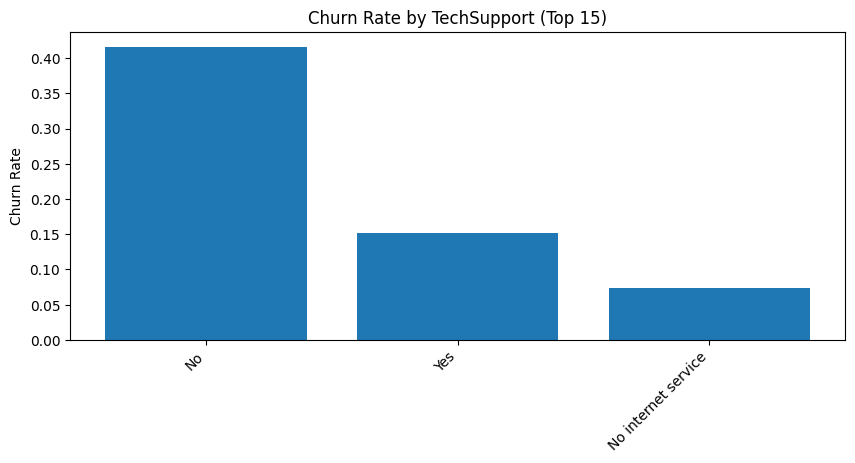

TechSupport
No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: Churn, dtype: float64

In [7]:
cat_cols = [c for c in df.columns if df[c].dtype == "object"]

def churn_rate_by(col):
    tmp = df.groupby(col)["Churn"].mean().sort_values(ascending=False)
    tmp = tmp.head(15)  # keep plots readable
    plt.figure(figsize=(10,4))
    plt.bar(tmp.index.astype(str), tmp.values)
    plt.title(f"Churn Rate by {col} (Top 15)")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45, ha="right")
    plt.show()
    return tmp

for c in ["Contract", "InternetService", "PaymentMethod", "TechSupport"]:
    display(churn_rate_by(c))


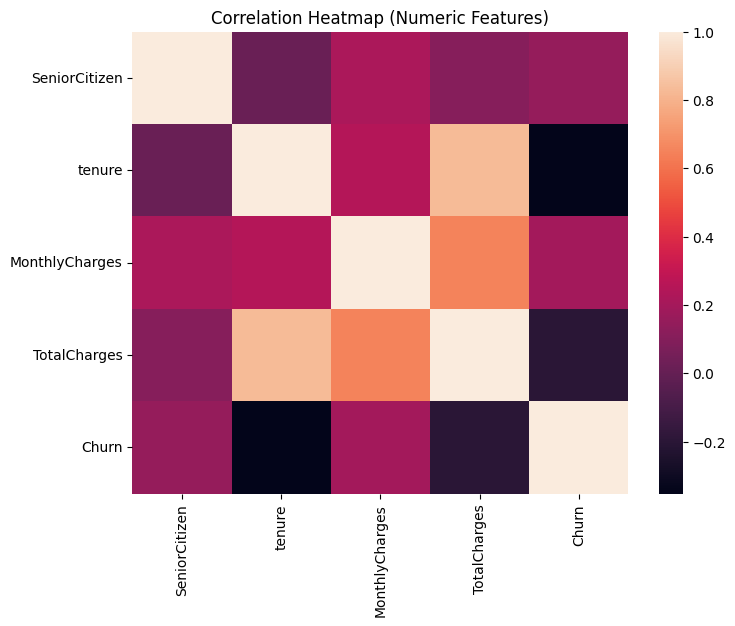

In [8]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

EDA Summary:

- The dataset contains customer demographics, service subscriptions, billing/payment info, and a churn label.

- TotalCharges includes blank values that convert to missing when cast to numeric; these likely correspond to very new customers.

- Churn is not perfectly balanced; evaluation should use ROC-AUC/PR-AUC, not accuracy alone.

- Strong churn signals appear in subscription and billing patterns (e.g., month-to-month contracts and certain payment methods show higher churn rates).

- Numeric features show separation between churn and non-churn groups, especially tenure and monthly charges, suggesting predictive signal for supervised models.